# My implementation

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the datasets

In [10]:
df_original = pd.read_csv('Mall_Customers.csv')
df = df_original.iloc[:, 1:]
X = df.values

### Encoding categorical features

In [13]:
def sum_prev (l_in):
    l_out = []
    l_out.append(l_in[0])
    for i in range(len(l_in)-1):
        l_out.append(l_out[i] + l_in[i+1])
    return [e - 1 for e in l_out]

# df and X must have the same data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = [0] # Change here
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')
columns_to_encode = [df.iloc[:, del_idx].nunique() for del_idx in columns_to_encode]
columns_to_encode = sum_prev(columns_to_encode)
X = np.array(ct.fit_transform(X))
X = np.delete(X, columns_to_encode, 1)

### Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X[:, 1:] = ss_X.fit_transform(X[:, 1:])

### Elbow method

Text(0, 0.5, 'wssse')

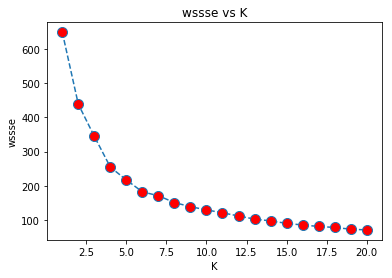

In [23]:
from sklearn.cluster import KMeans
wssse = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    wssse.append(kmeans.inertia_)
    
plt.plot(range(1, 21), wssse, ls='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('wssse vs K')
plt.xlabel('K')
plt.ylabel('wssse')

### Building the final model

In [24]:
# In one row
# y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X)

In [34]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_

### Exploring the created clusters

In [42]:
df_original.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.450000
std,57.879185,13.969007,26.264721,25.823522,1.210299
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,3.000000


In [39]:
pd.set_option('display.max_rows', df.shape[0])
df_original['Cluster'] = y_pred
df_original.sort_values(by='Cluster')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
71,72,Female,47,49,42,0
92,93,Male,48,60,49,0
57,58,Male,69,44,46,0
56,57,Female,51,44,50,0
55,56,Male,47,43,41,0
54,55,Female,50,43,45,0
53,54,Male,59,43,60,0
93,94,Female,40,60,40,0
50,51,Female,49,42,52,0
96,97,Female,47,60,47,0


In [43]:
# Cluster 0: medium to high age, medium income, medium spending score
# Cluster 1: medium age, medium to high income, low spending score
# Cluster 2: small to medium age, medium to high income, high spending score
# Cluster 3: small age, small to medium income, medium spending score

# Professors's implementation

In [46]:
df_original = pd.read_csv('Mall_Customers.csv')
df = df_original.iloc[:, 3:]
X = df.values

### Elbow method

Text(0, 0.5, 'wssse')

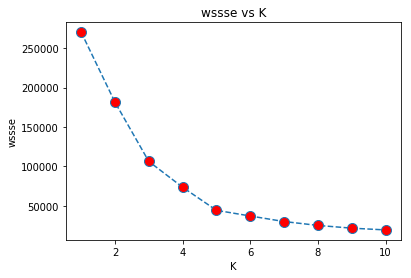

In [48]:
from sklearn.cluster import KMeans
wssse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    wssse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wssse, ls='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('wssse vs K')
plt.xlabel('K')
plt.ylabel('wssse')

### Building the final model

In [49]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_

In [51]:
df.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


### Visualizing the clusters

### Not unsing for loop

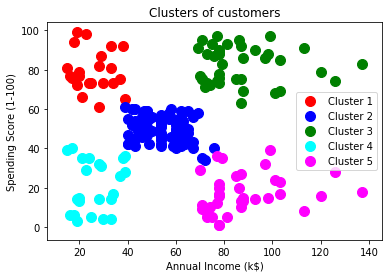

In [60]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red', s=100, label='Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', s=100, label='Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], c='green', s=100, label='Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], c='cyan', s=100, label='Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], c='magenta', s=100, label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

### Using for loop

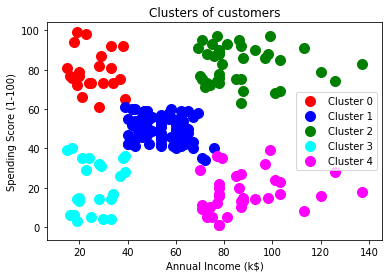

In [63]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(kmeans.n_clusters):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], c=colors[i], s=100, label='Cluster ' + str(i))
    
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()